<a href="https://colab.research.google.com/github/ThumbRocket/Pre-Learning_AI_Model/blob/main/1_wafer_Data_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Wafer 이미지 분류를 위한 데이터 전처리
[웨이퍼(Wafer) 이미지 데이터, Kaggle](https://www.kaggle.com/datasets/alexandremoritz/simulated-analog-wafer-pattern-recognition)

데이터셋은 5가지 패턴(ring, spot, trend, twospots, crescent)을 갖는 테스트를 포함

각 패턴은 웨이퍼의 특정 부분에 대한 결함을 나타내며, 그 결함의 특성에 따라 다음과 같이 구분

- ring: 웨이퍼의 경계를 따라 원형 패턴  

- spot: 웨이퍼 상의 임의의 위치에 있는 단일 원형 또는 타원형 얼룩  

- trend: 웨이퍼 전체에 걸쳐 일정한 경사 (방향에 따라 변화 있음)  

- twospots: 웨이퍼의 대칭되는 가장자리의 두 개의 얼룩  

- crescent: 웨이퍼의 가장자리의 초승달 모양 영역

In [1]:
import os
import subprocess
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt

import torch
from torchvision import transforms
from torch.utils.data import Dataset

In [2]:
# Data Download
!kaggle datasets download -d alexandremoritz/simulated-analog-wafer-pattern-recognition
!unzip -o simulated-analog-wafer-pattern-recognition.zip

data_path = "./"

Dataset URL: https://www.kaggle.com/datasets/alexandremoritz/simulated-analog-wafer-pattern-recognition
License(s): Attribution 4.0 International (CC BY 4.0)
100% 1.43G/1.43G [00:19<00:00, 162MB/s]
100% 1.43G/1.43G [00:19<00:00, 77.7MB/s]
Archive:  simulated-analog-wafer-pattern-recognition.zip
  inflating: Data Set Description.txt  
  inflating: test.csv                
  inflating: training_1.csv          
  inflating: training_2.csv          
  inflating: training_3.csv          
  inflating: training_4.csv          


In [3]:
# Data Information
!grep -A 10 '5. Number of Instances:' "./Data Set Description.txt"

5. Number of Instances: 
  |--------------------------------------------------------------|
  |      Dataset       |  # of instances  |  Wafermap numbers    |
  |--------------------------------------------------------------|
  |   training_1.csv   |     3.501.800    |      1  to  200      |
  |   training_2.csv   |     3.501.800    |    201  to  400      |
  |   training_3.csv   |     3.501.800    |    401  to  600      |
  |   training_4.csv   |     3.501.800    |    601  to  800      |
  |--------------------------------------------------------------|
  |      test.csv      |     3.501.800    |    801  to 1000      |
  |--------------------------------------------------------------|


In [4]:
!head -n 3 "{root_path}/data/wafer_image/training_1.csv"

head: cannot open '{root_path}/data/wafer_image/training_1.csv' for reading: No such file or directory


In [5]:
df = pd.DataFrame()

for i in range(1, 5):
    tmp_df = pd.read_csv(data_path+"training_"+str(i)+".csv",
                         sep=";",
                         decimal=",",
                         usecols=["lot", "wafer", "x", "y", "ring", "spot", "trend", "twospots", "crescent"],
                         dtype={
                             "lot":np.string_,
                             "wafer":np.int16,
                             "x":np.int16,
                             "y":np.int16,
                             "ring":np.float64,
                             "spot":np.float64,
                             "trend":np.float64,
                             "twospot":np.float64,
                             "cresent":np.float64}
                         )

    df = pd.concat([df, tmp_df])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14007200 entries, 0 to 3501799
Data columns (total 9 columns):
 #   Column    Dtype  
---  ------    -----  
 0   lot       object 
 1   wafer     int16  
 2   x         int16  
 3   y         int16  
 4   ring      float64
 5   spot      float64
 6   trend     float64
 7   twospots  float64
 8   crescent  float64
dtypes: float64(5), int16(3), object(1)
memory usage: 828.2+ MB


In [7]:
df.describe()

,wafer,x,y,ring,spot,trend,twospots,crescent
count,1.400720e+07,1.400720e+07,1.400720e+07,1.400720e+07,1.400720e+07,1.400720e+07,1.400720e+07,1.400720e+07
mean,4.005000e+02,5.678257e+01,9.700611e+01,5.469679e-03,2.665826e-04,9.735479e-01,4.543228e-03,5.268330e-02
std,2.309399e+02,2.899683e+01,4.824405e+01,1.159486e-02,7.129806e-04,7.868547e-01,7.058368e-03,1.055552e-01
min,1.000000e+00,1.000000e+00,1.000000e+00,-1.427011e-02,-8.456652e-04,-1.117635e+00,-3.947682e-03,-8.058853e-02
25%,2.007500e+02,3.300000e+01,5.800000e+01,-9.795015e-05,-2.485631e-05,3.922994e-01,2.030534e-04,-1.953638e-03
50%,4.005000e+02,5.700000e+01,9.700000e+01,7.707439e-04,3.904528e-05,9.195956e-01,1.149917e-03,7.280033e-03
75%,6.002500e+02,8.000000e+01,1.360000e+02,6.223677e-03,1.707593e-04,1.554746e+00,6.192340e-03,5.214216e-02
max,8.000000e+02,1.150000e+02,1.930000e+02,1.100063e-01,8.482756e-03,3.165528e+00,4.690239e-02,9.146742e-01


In [8]:
df.isnull().sum()

lot         0
wafer       0
x           0
y           0
ring        0
spot        0
trend       0
twospots    0
crescent    0
dtype: int64

In [9]:
df["lot"].unique()

array(['Lot_1', 'Lot_2', 'Lot_3', 'Lot_4'], dtype=object)

In [10]:
df["wafer"].unique()[:3], df["wafer"].unique()[-3:]

(array([1, 2, 3], dtype=int16), array([798, 799, 800], dtype=int16))

In [11]:
print(df["x"].unique().min())
print(df["x"].unique().max())

1
115


In [12]:
print(df["y"].unique().min())
print(df["y"].unique().max())

1
193


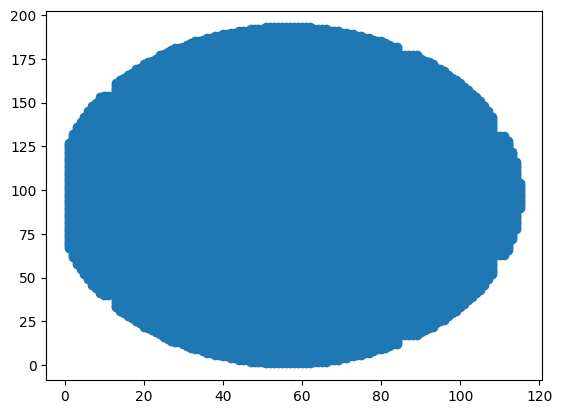

In [13]:
wafer_xy = df[["wafer", "x", "y"]]
plt.scatter(x=wafer_xy[wafer_xy["wafer"]==1]["x"], y=wafer_xy[wafer_xy["wafer"]==1]["y"])
plt.show()

In [14]:
def create_image(df, wafer_id, pattern):

    Image =np.zeros([193, 115])

    for i, row in df[df["wafer"]==wafer_id].iterrows():
        Image[(row["y"]-1), row["x"]-1] = row[pattern]

    return Image

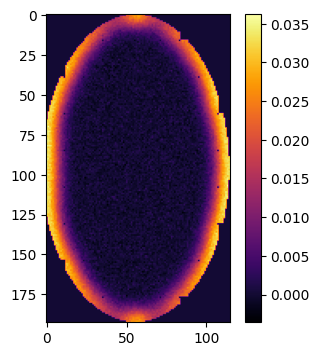

In [15]:
plt.figure(figsize=(4,4))
plt.imshow(create_image(df, 1, "ring"), cmap="inferno")
plt.colorbar()
plt.show()

In [16]:
pattern_list=df.columns[4:].to_list()

In [17]:
def create_images_from_df(df, wafer_id):

    images=[]
    labels=[]

    for index, feature in enumerate(pattern_list):
        image = np.copy(df[df["wafer"]==wafer_id].pivot(index="x", columns="y", values=feature).fillna(0).values)
        images.append(image)
        labels.append(index)

    return images, labels

In [18]:
create_images_from_df(df, 1)

([array([[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]]),
  array([[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]]),
  array([[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]]),
  array([[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 

In [19]:
all_images=[]
all_labels=[]

for id in tqdm(df["wafer"].unique()):
    image, label = create_images_from_df(df, id)

    all_images.extend(image)
    all_labels.extend(label)

image_df = pd.DataFrame({"image":all_images, "label":all_labels})

100%|██████████| 800/800 [01:27<00:00,  9.16it/s]


In [20]:
image_df

,image,label
0,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0
1,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",1
2,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",2
3,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",3
4,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",4
...,...,...
3995,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0
3996,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",1
3997,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",2
3998,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",3


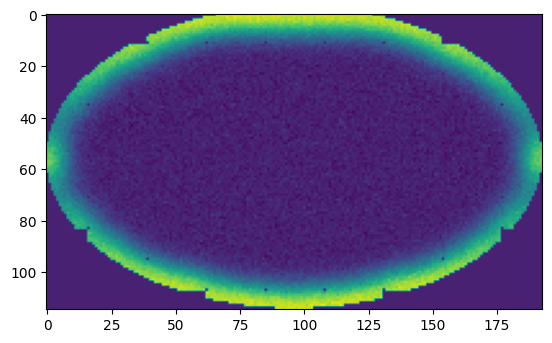

In [21]:
plt.imshow(image_df["image"][0])

In [22]:
print(np.min(image_df["image"].to_list()))
print(np.max(image_df["image"].to_list()))

-1.11763458961258
3.16552793555252


In [23]:
class WaferDataSet(Dataset):
    def __init__(self, df, transform=None):
        self.df = df
        self.transform=transform

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        image = torch.tensor(self.df.iloc[idx, 0]).float()
        label = torch.tensor(self.df.iloc[idx, 1])

        if self.transform:
            image = self.transform(image)

        return image, label

In [24]:
def min_max_scaling(img):
    min_val = torch.min(img)
    max_val = torch.max(img)

    if max_val - min_val < 1e-9:
        return img
    else:
        return (img - min_val)/(max_val - min_val)

resize_transform = transforms.Compose(
    [transforms.Lambda(min_max_scaling),
     transforms.ToPILImage(),
     transforms.Resize((96, 96)),
     transforms.ToTensor()]
)

In [25]:
WaferData = WaferDataSet(image_df)

In [26]:
WaferData[2]

(tensor([[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]),
 tensor(2))

In [27]:
len(WaferData)

4000

In [28]:
image, label = WaferData[4]

In [29]:
image.shape

torch.Size([115, 193])

In [30]:
label

tensor(4)

In [31]:
WaferData = WaferDataSet(image_df, resize_transform)

In [32]:
image, label = WaferData[3]

In [33]:
image.shape

torch.Size([1, 96, 96])

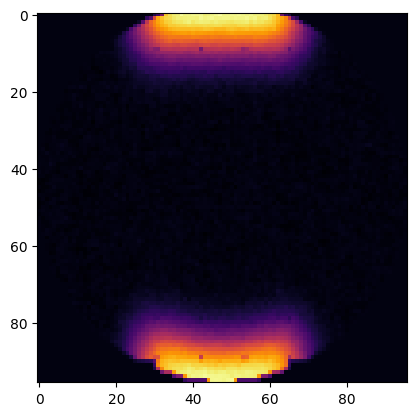

In [34]:
plt.imshow(image.squeeze(0).numpy(), cmap='inferno')
plt.show()

In [36]:
test_df = pd.read_csv("test.csv",
                        sep=";",
                        decimal=",",
                        usecols=["lot", "wafer", "x", "y", "ring", "spot", "trend", "twospots", "crescent"],
                        dtype={
                            "lot":np.string_,
                            "wafer":np.int16,
                            "x":np.int16,
                            "y":np.int16,
                            "ring":np.float64,
                            "spot":np.float64,
                            "trend":np.float64,
                            "twospot":np.float64,
                            "cresent":np.float64}
                        )

In [37]:
test_images = []
test_labels = []

for id in tqdm(test_df["wafer"].unique()):
    image, label = create_images_from_df(test_df, id)

    test_images.extend(image)
    test_labels.extend(label)

100%|██████████| 200/200 [00:09<00:00, 21.48it/s]


In [39]:
import pickle
# list data dump

with open("image.pkl", "wb") as f:
    pickle.dump(all_images, f)

with open("label.pkl", "wb") as f:
    pickle.dump(all_labels, f)

with open("test_image.pkl", "wb") as f:
    pickle.dump(test_images, f)

with open("test_label.pkl", "wb") as f:
    pickle.dump(test_labels, f)

with open("category.pkl", "wb") as f:
    pickle.dump(pattern_list, f)